In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image

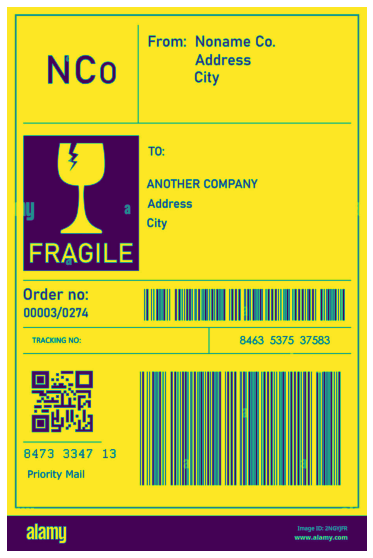

In [2]:
img = cv2.imread("SET-6/Bill.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(img)
plt.show()

#### Edge Detection

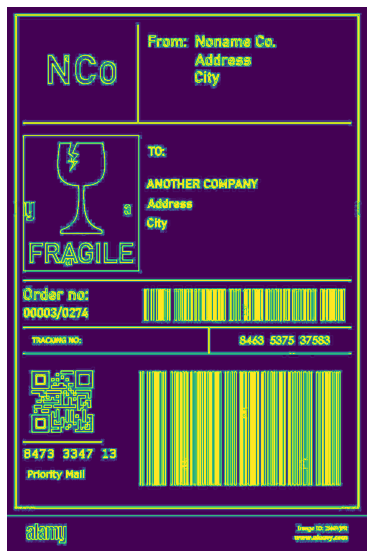

In [3]:
gradX = cv2.Sobel(img, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(img, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

gradient = cv2.subtract(gradX, gradY)
# gradient = cv2.add(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(gradient)
plt.show()

#### Thresholding

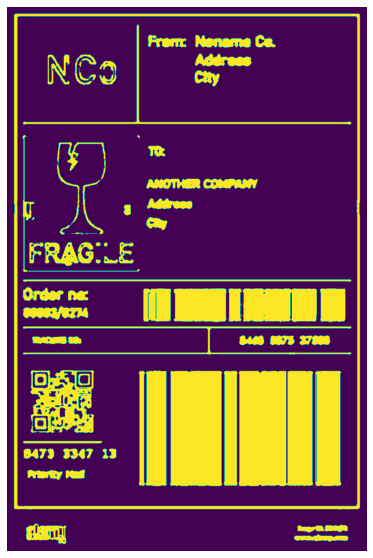

In [4]:
blurred = cv2.blur(gradient, (7, 7))
(_, thresh) = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(thresh)
plt.show()

#### Morphological Transformations - CLOSING

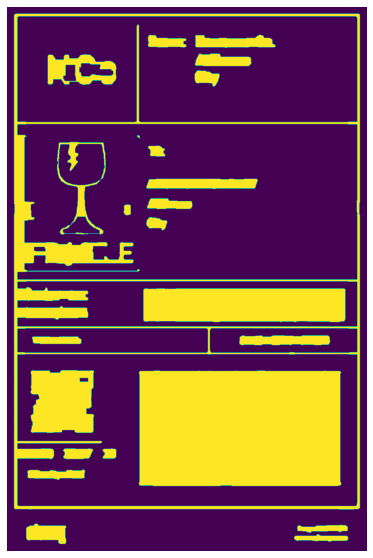

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(closed)
plt.show()

#### Contours

In [6]:
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

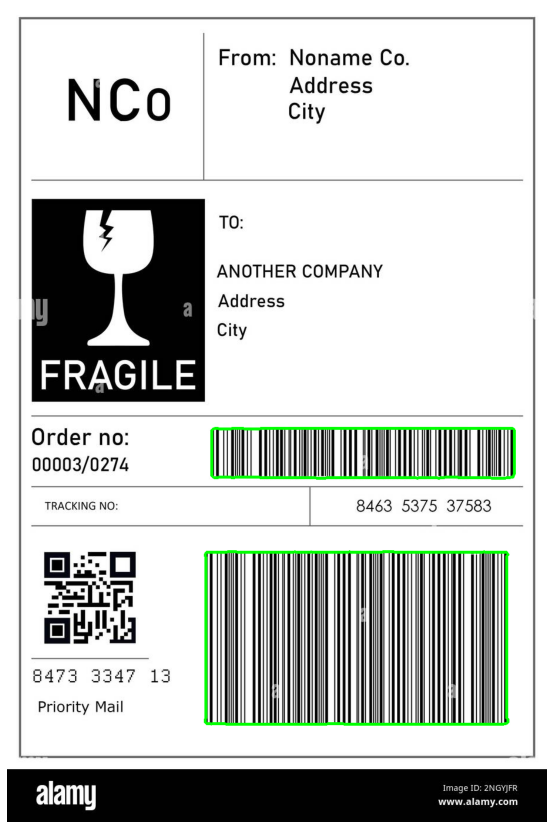

In [7]:
image = plt.imread("SET-6/Bill.jpg")
box1 = cv2.drawContours(image, contours, 8, (0,255,0), 3)
box2 = cv2.drawContours(image, contours, 16, (0,255,0), 3)

plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(box1)
plt.imshow(box2)
plt.show()

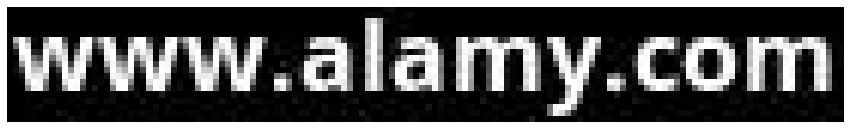

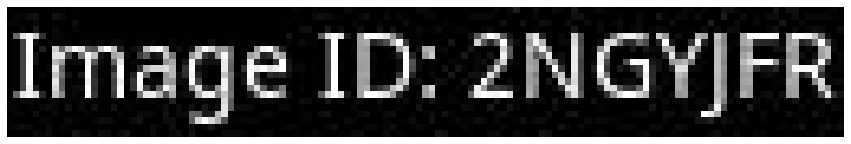

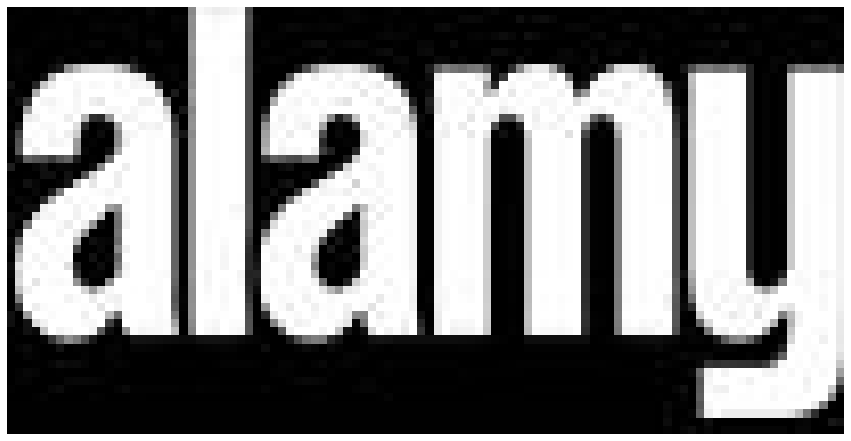

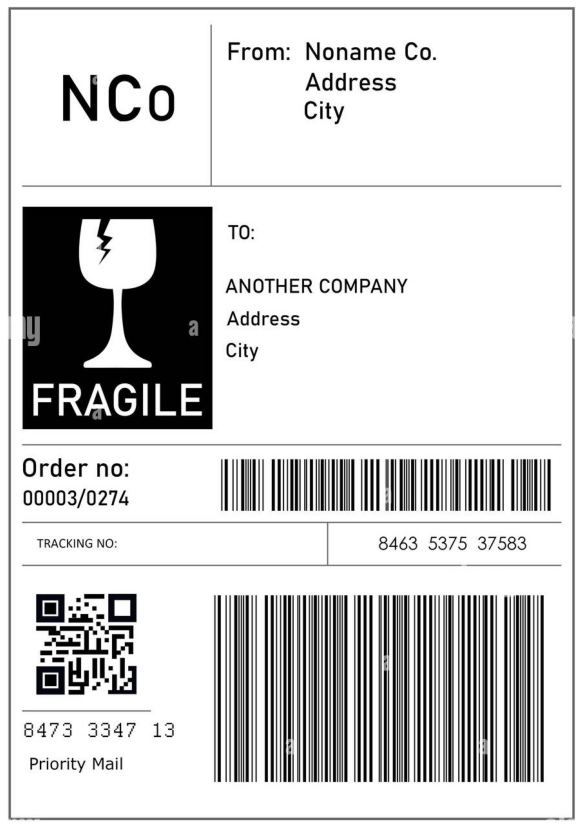

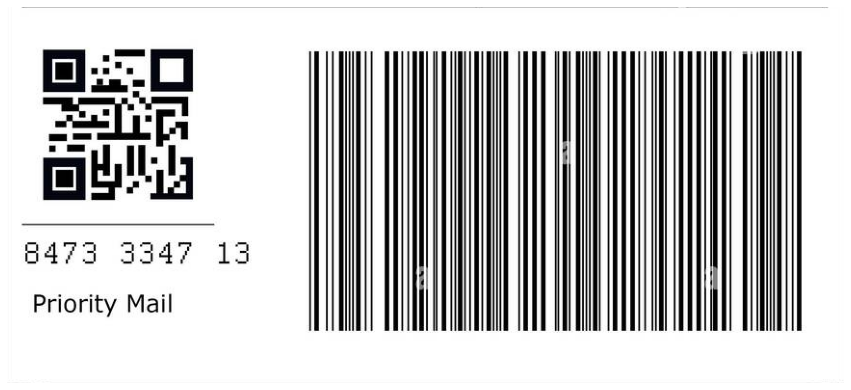

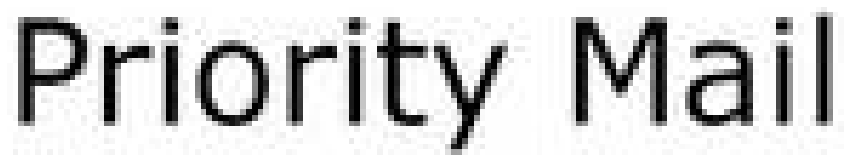

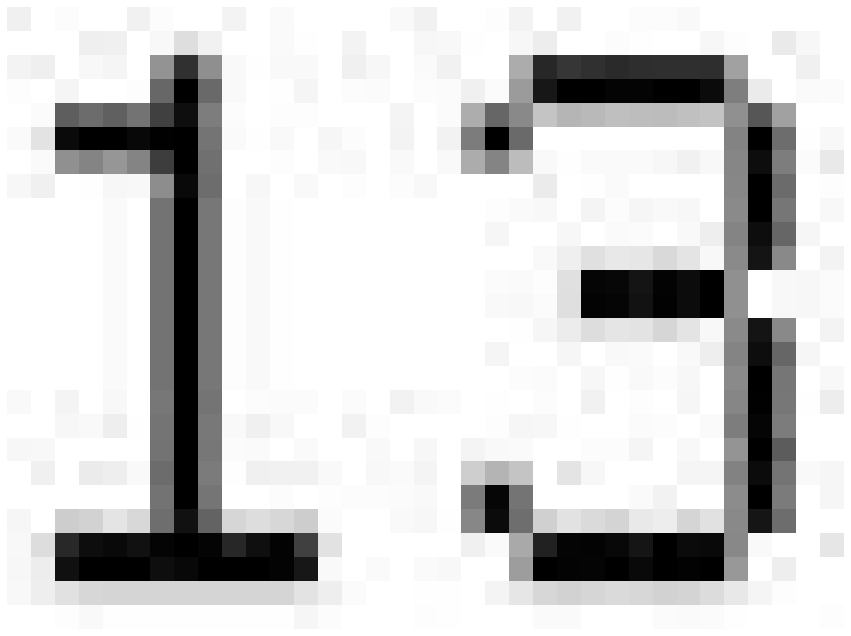

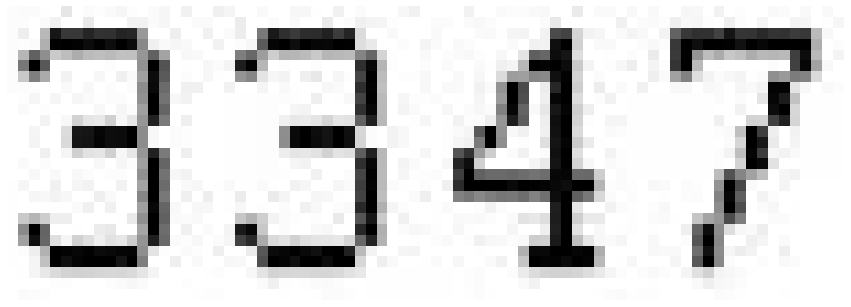

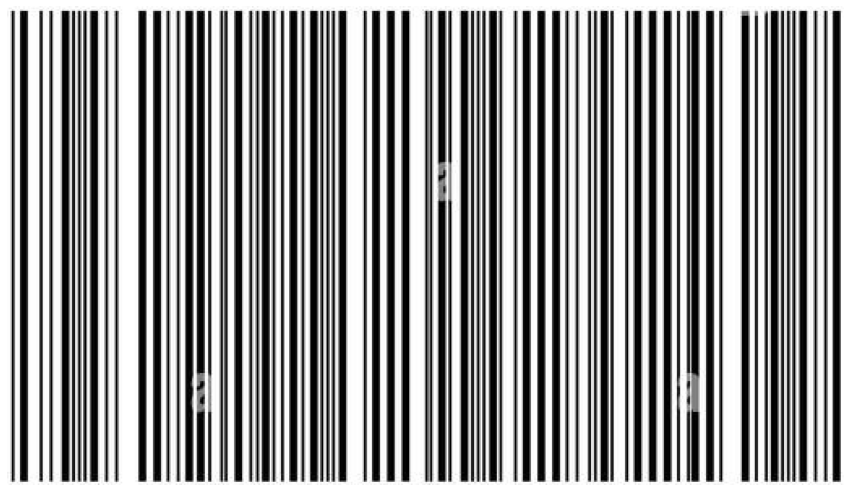

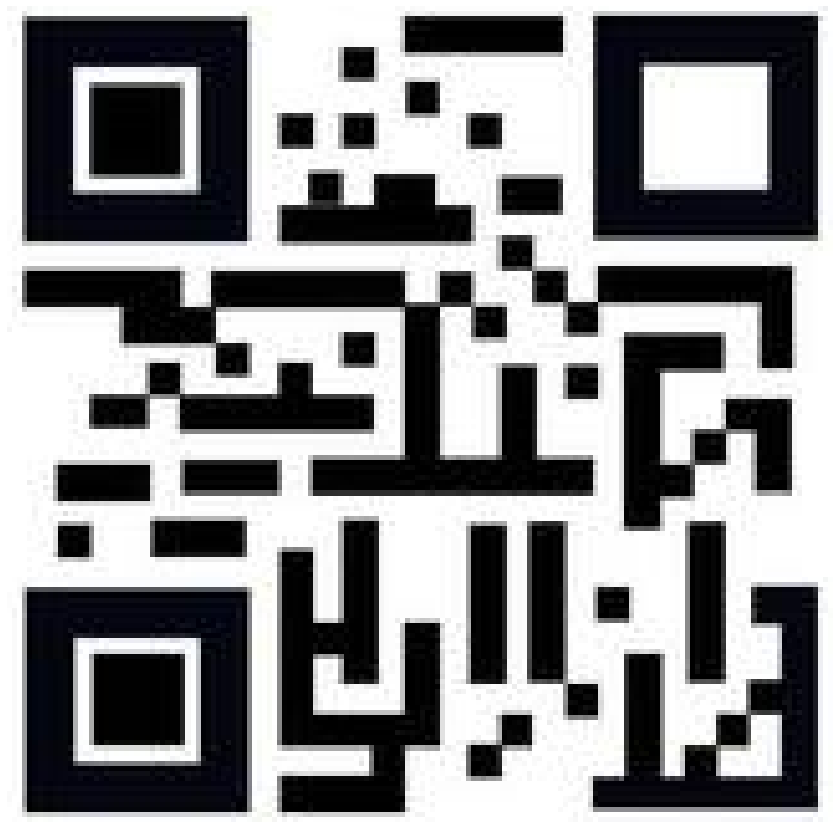

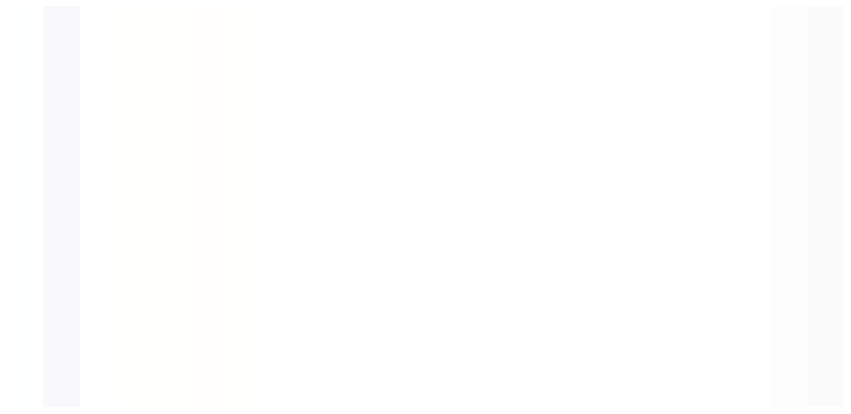

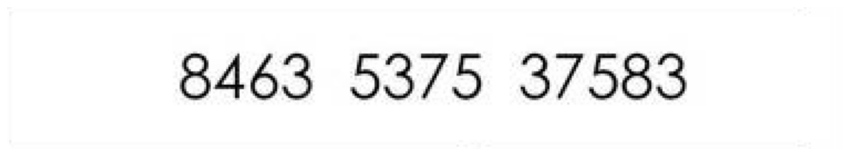

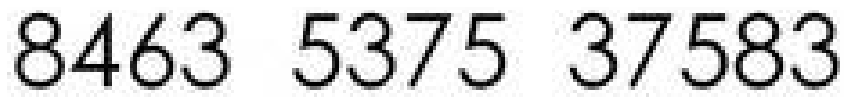

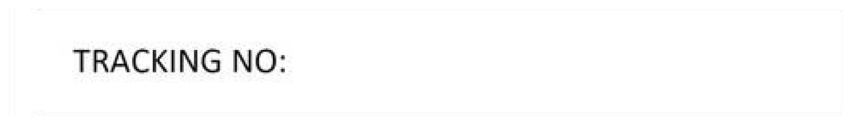

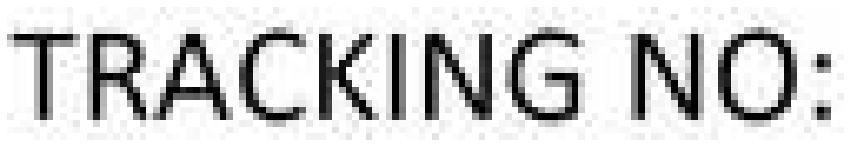

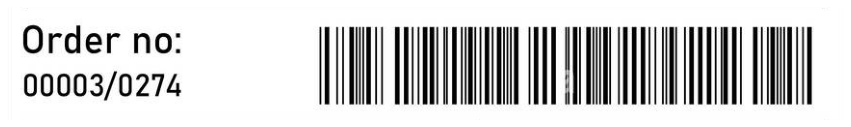

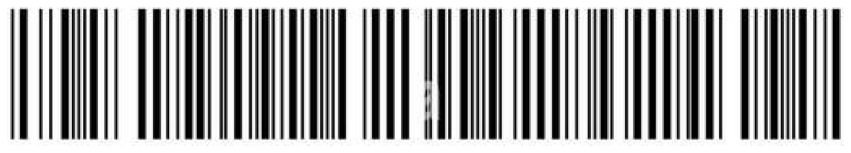

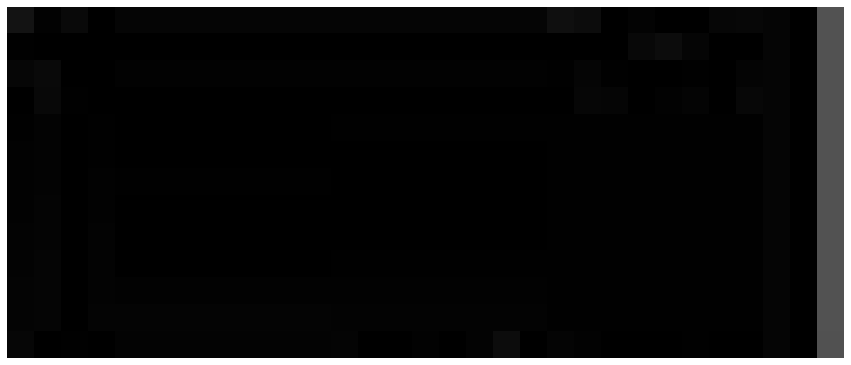

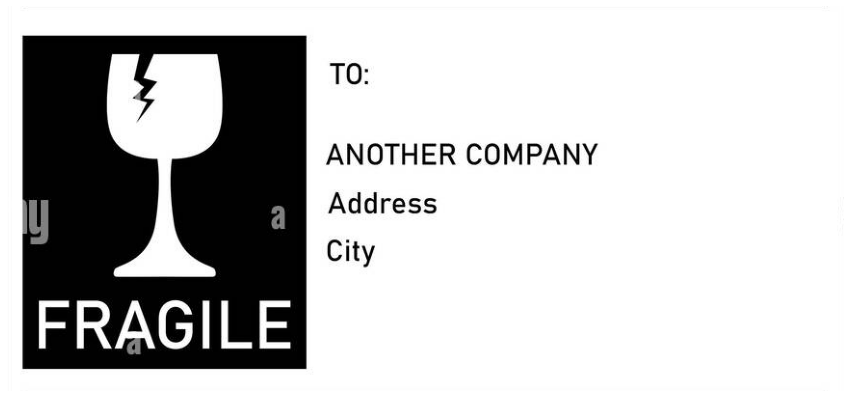

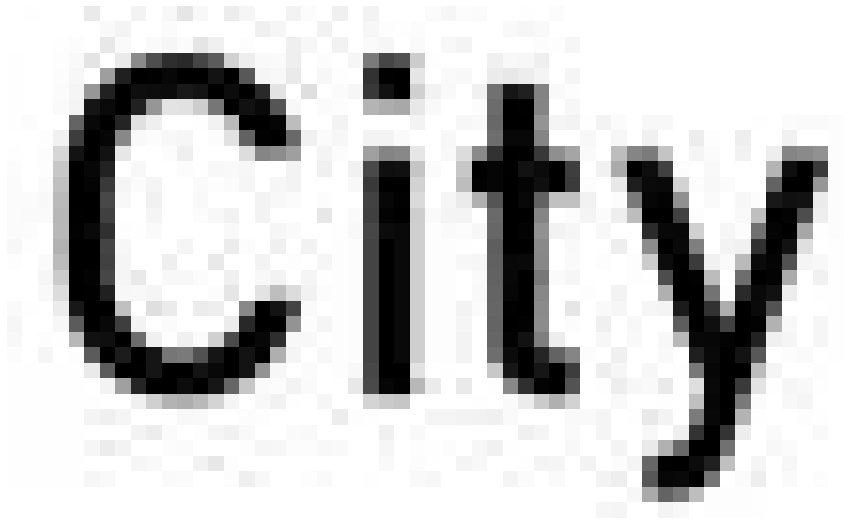

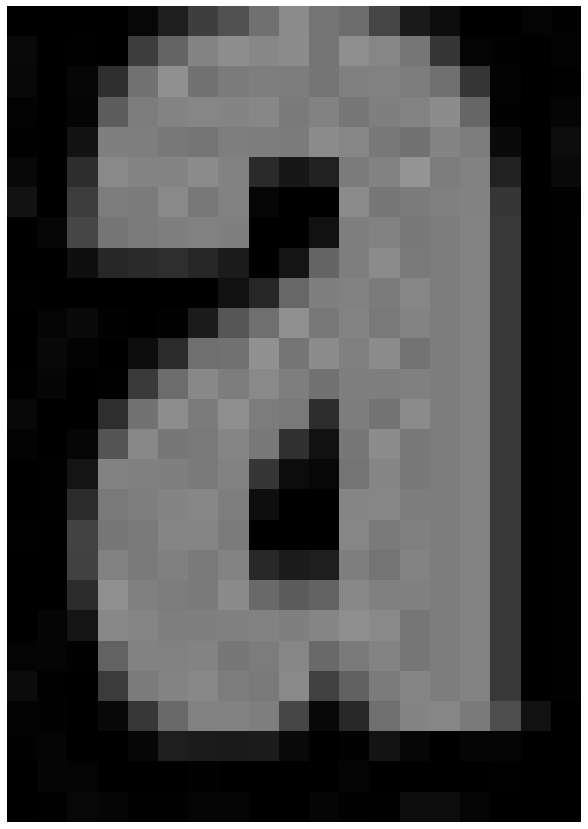

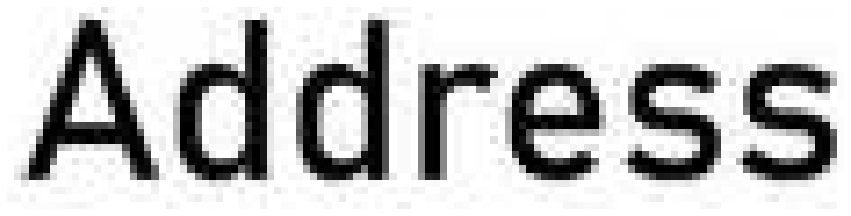

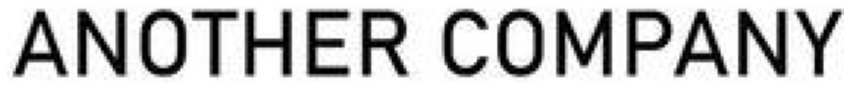

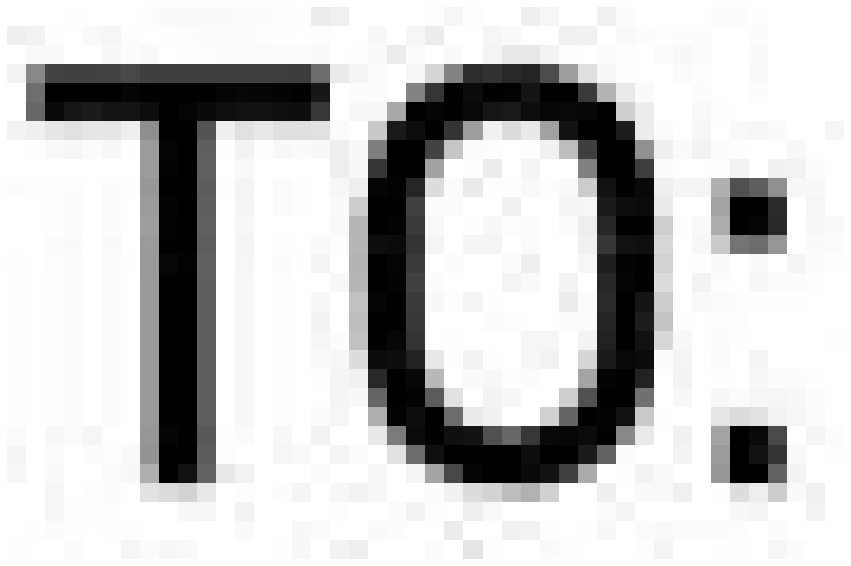

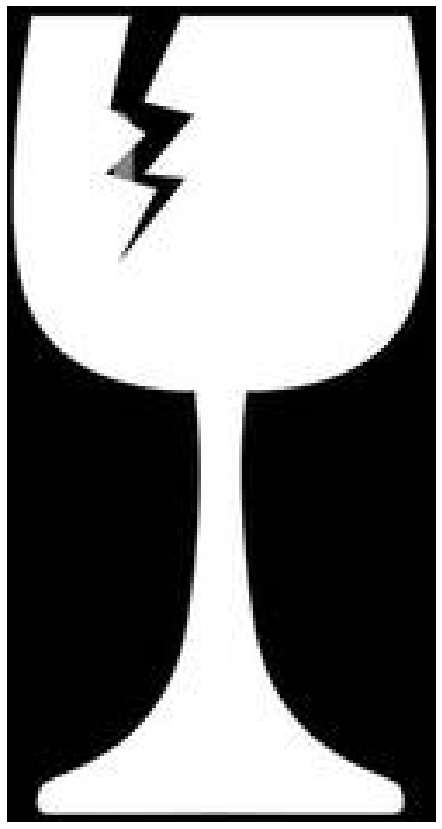

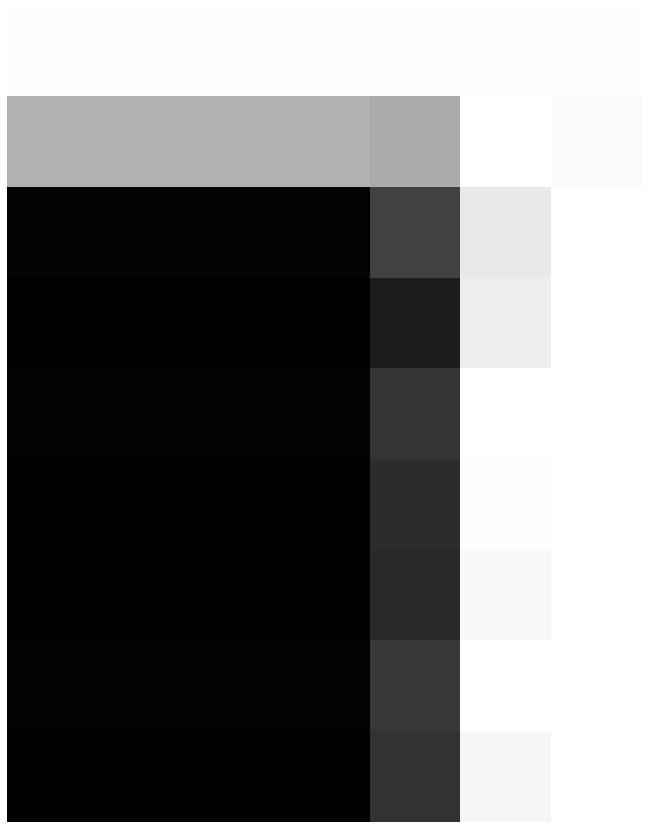

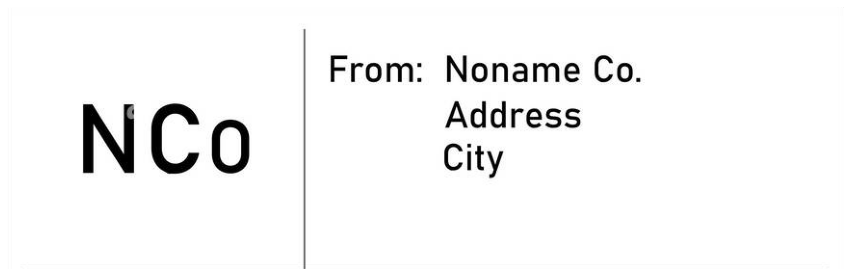

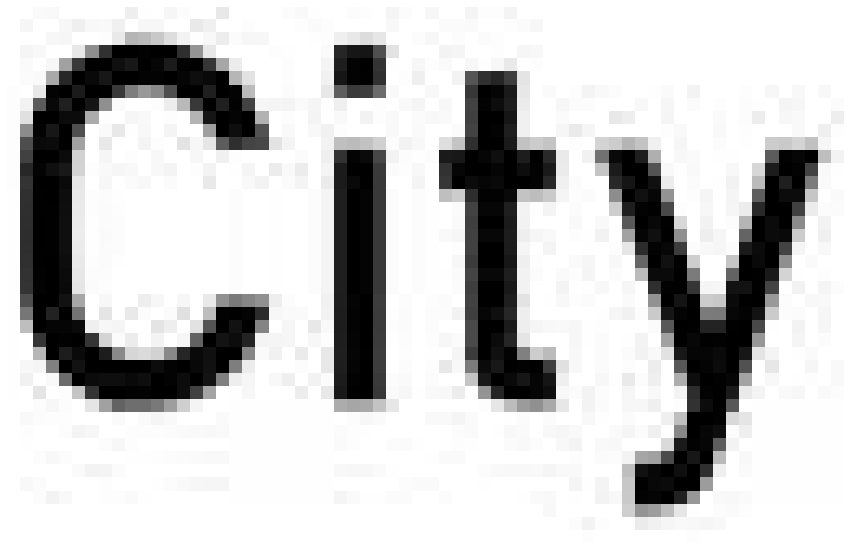

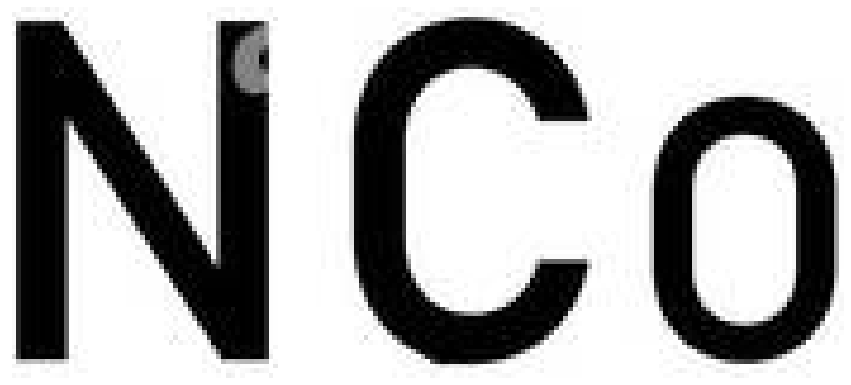

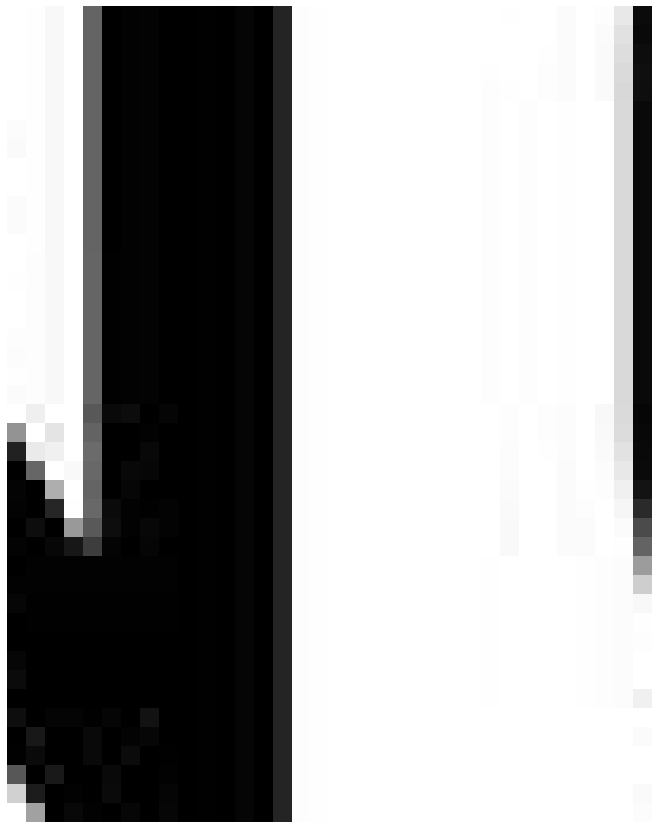

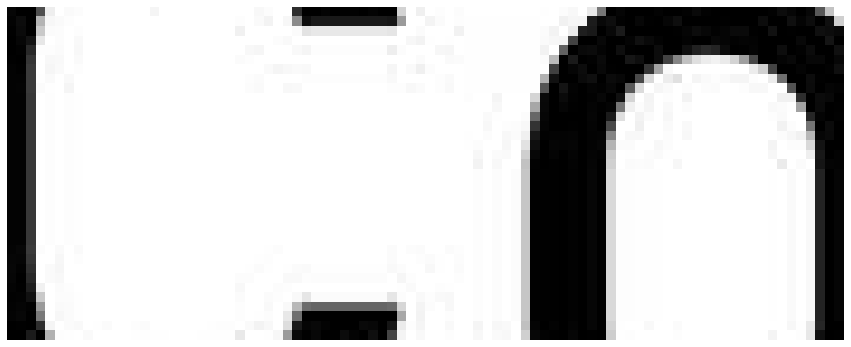

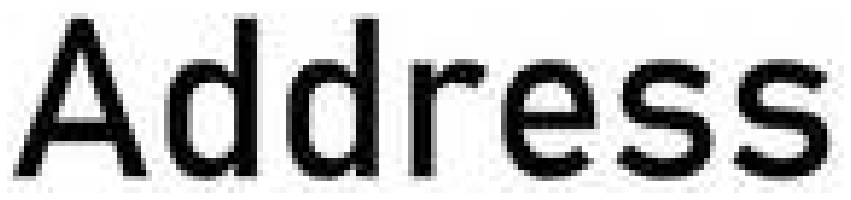

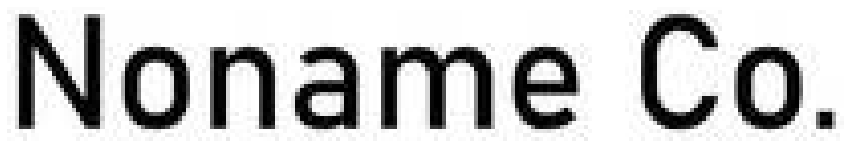

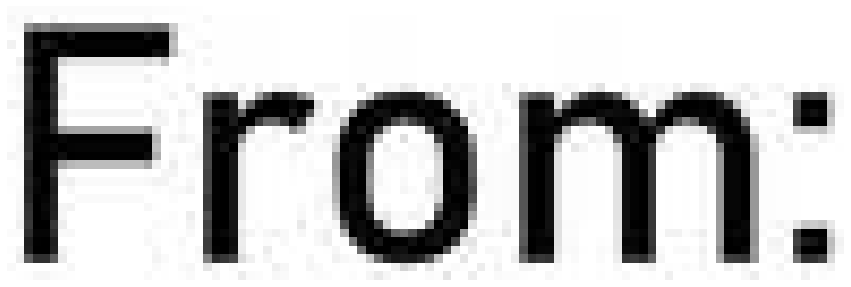

In [8]:
for idx in range(len(contours)):

    image = plt.imread("SET-6/Bill.jpg")

    x, y, width, height = cv2.boundingRect(contours[idx])
    zero = np.zeros(image.shape).astype(np.uint8)
    rect = cv2.rectangle(zero, (x, y), (x+width, y+height), (255, 255, 255), -1)

    box = cv2.bitwise_and(image, rect)
    box = box[y:y+height, x:x+width]
    
    plt.figure(figsize=(15, 15))
    plt.axis("off")
    plt.imshow(box)
    plt.show()